In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import tree

In [60]:
eps = np.finfo(float).eps

Generating data

In [36]:
dataset={'Alt':['yes','yes','no','yes','yes','no','no','no','no','yes','no','yes'],
'Bar':['no','no','yes','no','no','yes','yes','no','yes','yes','no','yes'],
'Fri' : ['no','no','no','yes','yes','no','no','no','yes','yes','no','yes'],
'Hun' : ['yes','yes','no','yes','no','yes','no','yes','no','yes','no','yes'],
'Pat' : ['some','full','some','full','full','some','none','some','full','full','none','full'] ,
'Price' : [3,1,1,1,3,2,1,2,1,3,1,1],
'Rain' : ['no','no','no','yes','no','yes','yes','yes','yes','no','no','no'],
'Res' : ['yes','no','no','no','yes','yes','no','yes','no','yes','no','no'],
'Type' : ['french','thai','burger','thai','french','italian','burger','thai','burger','italian','thai','burger'],
'Est' : [1,3,1,2,4,1,1,1,4,2,1,3],
'y' : ['yes','no','yes','yes','no','yes','no','yes','no','no','no','yes']}

In [39]:
df = pd.DataFrame(dataset)
df

Alt  Bar  Fri  Hun   Pat  Price Rain  Res     Type  Est    y
0   yes   no   no  yes  some      3   no  yes   french    1  yes
1   yes   no   no  yes  full      1   no   no     thai    3   no
2    no  yes   no   no  some      1   no   no   burger    1  yes
3   yes   no  yes  yes  full      1  yes   no     thai    2  yes
4   yes   no  yes   no  full      3   no  yes   french    4   no
5    no  yes   no  yes  some      2  yes  yes  italian    1  yes
6    no  yes   no   no  none      1  yes   no   burger    1   no
7    no   no   no  yes  some      2  yes  yes     thai    1  yes
8    no  yes  yes   no  full      1  yes   no   burger    4   no
9   yes  yes  yes  yes  full      3   no  yes  italian    2   no
10   no   no   no   no  none      1   no   no     thai    1   no
11  yes  yes  yes  yes  full      1   no   no   burger    3  yes

we define a function to calculate the entropy of the data. We have two labels: yes,no.P(label=no)=num,(label=no)/num(all labels)
    

In [8]:
def find_entropy(df):
    label = df.keys()[-1]
    entropy = 0
    values = df[label].unique()
    for value in values:
        fraction = df[label].value_counts()[value]/len(df[lebel])
        entropy += -fraction*np.log2(fraction)
    return entropy
    


We calculate H(y|x): We get data set and the feature. first we get all our unique labels(which are 'yes' and 'no').
the selected feature has different variables;num is the number of samples that have 

In [9]:
def entropy_feature(df,feature):
    label = df.keys()[-1]   
    target_variables = df[label].unique()  #This gives all 'Yes' and 'No'
    variables = df[feature].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[feature][df[feature]==variable][df[label] ==target_variable])
            den = len(df[feature][df[feature]==variable])
            p = num/(den+eps)
            entropy += -p*np.log2(p+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

We define a function called "min_entropy" that calculates H(y|x) for every feature and returns the feature that has the min H(y|x)

In [10]:
def min_entropy(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        IG.append(entropy_feature(df,key))
    return df.keys()[:-1][np.argmin(IG)]

In [11]:
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)

Now we define a recursive function to build a tree. each time we find the best feature, get its values, then for each value we wether branch it or label it. 

In [12]:
def buildTree(df,tree=None): 
    node = min_entropy(df)
    attValue = np.unique(df[node])
      if tree is None:                    
        tree={}
        tree[node] = {} 
    for value in attValue:
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['y'],return_counts=True)                              
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively                    
    return tree

In [13]:
tree=buildTree(df)
print(tree)

{'Pat': {'full': {'Hun': {'no': 'no', 'yes': {'Type': {'burger': 'yes', 'italian': 'no', 'thai': {'Fri': {'no': 'no', 'yes': 'yes'}}}}}}, 'none': 'no', 'some': 'yes'}}


We first map our data frame into numbers

In [51]:
y=df['y']
x=df.drop(['y'], axis = 1)
x['Alt']=x.Alt.map({'yes': 1, 'no': 0})
x['Bar']=x.Bar.map({'yes': 1, 'no': 0})
x['Fri']=x.Fri.map({'yes': 1, 'no': 0})
x['Hun']=x.Hun.map({'yes': 1, 'no': 0})
x['Pat']=x.Pat.map({'some': 1, 'none': 0, 'full':2})
x['Rain']=x.Rain.map({'yes': 1, 'no': 0})
x['Res']=x.Res.map({'yes': 1, 'no': 0})
x['Type']=x.Type.map({'french': 1, 'thai': 0,'burger':2, 'italian':3 })
y=y.map({'yes': 1, 'no': 0})
feature_cols = ['Alt', 'Bar', 'Fri', 'Hun','Pat','Price','Rain','Res','Type','Est']

In [77]:
clf = clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x,y)


[Text(418.5, 489.24, 'Hun <= 0.5\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(251.10000000000002, 380.52000000000004, 'Fri <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(167.4, 271.8, 'Pat <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(83.7, 163.08000000000004, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.8, 271.8, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(585.9, 380.52000000000004, 'Est <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(502.20000000000005, 271.8, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(669.6, 271.8, 'Type <= 2.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(585.9, 163.08000000000004, 'Fri <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(502.20000000000005, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(669.6, 54.360000000000014, 'entropy = 0.0\nsa

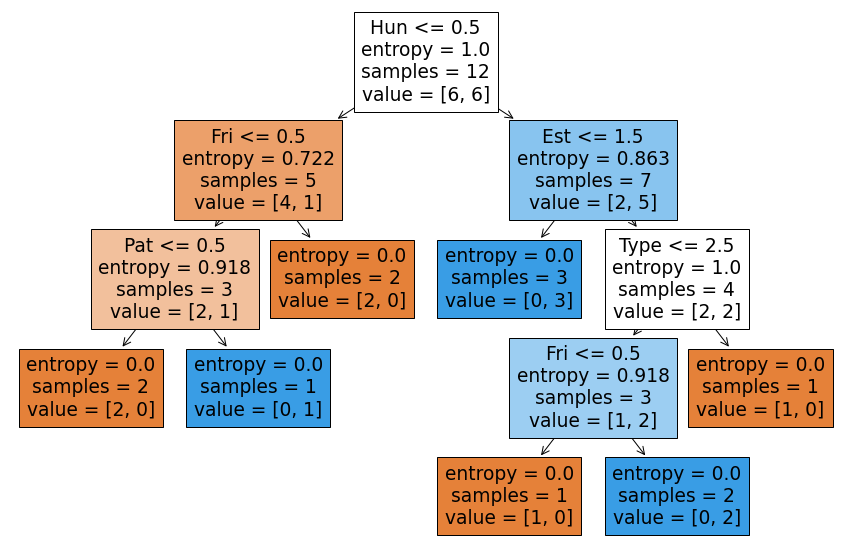

In [78]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf,feature_names=feature_cols,filled=True)

As we can see, for every node,it finds the feature with least entropy until it reaches a leaf with entropy of 0